# SpaCy

[![Index](https://img.shields.io/badge/Index-blue)](../index.ipynb)
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/digillia/Digillia-Colab/blob/main/tools/spacy.ipynb)

SpaCy est une bibliothèque de code pour le traitement du langage naturel (NLP).
- https://github.com/explosion/spaCy
- https://spacy.io/

On préfère SpaCy aux alternatives suivantes:
- https://github.com/nltk/nltk

In [1]:
import sys

# Supprimer les commentaires pour installer
# !pip3 install -q -U matplotlib
# !pip3 install -q -U numpy
# !pip3 install -q -U scikit-learn
# !pip3 install -q -U spacy

# À installer dans tous les cas pour Google Colab
if 'google.colab' in sys.modules:
    !pip3 install -q -U mplcursors
    !pip3 install -q -U ipympl
    !pip3 install -q -U worldcloud
    !python3 -m spacy download fr_core_news_sm # modèle compact pour le français - https://spacy.io/models/fr

In [2]:
import spacy

nlp = spacy.load('fr_core_news_sm')
text = "la petite chienne court après la balle."
doc = nlp(text)

/Users/jlchereau/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Tokenisation

La tokenisation consiste à découper un texte en unités plus petites, appelées tokens, qui peuvent ensuite être traitées par des modèles d'apprentissage automatique de traitement du langage naturel.

In [3]:
for token in doc:
    print(token.text)

la
petite
chienne
court
après
la
balle
.


## Lemmatisation

La lemmatisation consiste à réduire un mot à sa forme de base, appelée “lemme”. Le lemme est généralement un mot du dictionnaire qui représente le mot d'origine. Par exemple, le lemme de l'adjectif “petite” est “petit”.

In [4]:
for token in doc:
    print(token.text, '->', token.lemma_)

la -> le
petite -> petit
chienne -> chienne
court -> court
après -> après
la -> le
balle -> balle
. -> .


## PoS Tagging

Le Part-of-Speech Tagging ou l'étiquetage grammatical (en français) essaye d’attribuer une étiquette à chaque mot d’une phrase représentant la classe grammaticale de ce mot (nom propre, adjectif, verbe, etc).

In [5]:
for token in doc:
    print(token.text, '->', token.pos_) 

la -> DET
petite -> ADJ
chienne -> NOUN
court -> ADJ
après -> ADP
la -> DET
balle -> NOUN
. -> PUNCT


## Stop words

Les stop words sont un ensemble de mots couramment utilisés qui n’apportent pas d’information pour comprendre le sens du texte, comme le, la, un, une, etc. En traitement du langage natural, on cherche souvent à les éliminer pour se concentrer sur les mots riches de sens.

In [6]:
from spacy.lang.fr.stop_words import STOP_WORDS # contient les stop words en français

meaningful_tokens = []
for token in doc:
    if token.text not in STOP_WORDS:
        meaningful_tokens.append(token)
meaningful_tokens

[petite, chienne, court, balle, .]

In [7]:
type(STOP_WORDS)

set

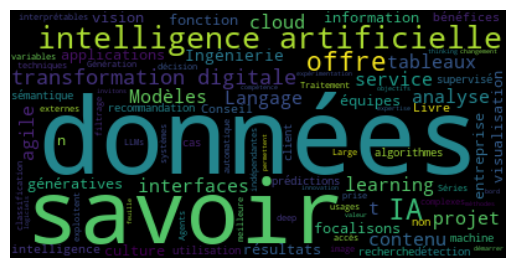

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bs4 import BeautifulSoup
from urllib.request import urlopen

with urlopen('https://www.digillia.com') as response:
    soup = BeautifulSoup(response, 'html.parser')
    STOP_WORDS.update(['d', 'l', 'Digillia'])
    wordcloud = WordCloud(stopwords = STOP_WORDS, collocations=True).generate(soup.get_text())
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

## Word embedding

Le Word Embedding (ou plongement lexical en français) est une méthode d'encodage qui vise à représenter les mots ou les phrases d’un texte par des vecteurs de nombres réels, décrit dans un modèle vectoriel (ou Vector Space Model), notamment à des fins de comparaison.

In [9]:
for token in meaningful_tokens:
    print(token.text, '->', token.vector) 

petite -> [-1.1801080e+00  4.4308090e+00  1.6367952e+00 -3.2228432e+00
 -2.4488101e+00 -3.0054703e+00  2.7773752e+00  1.1064811e+00
 -5.8037248e+00  2.6085579e+00 -1.4868605e+00  4.3556032e+00
 -8.3231008e-01  3.6200447e+00  2.9481339e-01 -4.5109671e-01
  6.9591045e+00  2.0072207e+00 -7.6686025e-02 -3.9068332e+00
 -7.6405029e+00 -1.0756768e+00 -1.8130282e-01 -3.0047803e+00
  6.0534353e+00 -1.8673252e+00 -6.0592431e-01 -7.5262403e-01
 -1.7681978e+00 -1.1085639e+00 -2.5105045e+00 -3.0608320e+00
  2.0636497e+00  3.5261813e-01 -5.6750250e-01 -6.3179249e-01
 -1.9752696e+00 -2.2256575e+00 -2.8794732e+00 -6.4547195e+00
 -1.7097976e+00 -3.4736013e+00  7.1012270e-01 -3.4470658e+00
  7.3811941e+00 -3.5134351e+00 -4.9389844e+00 -4.2680292e+00
 -1.2265478e+00 -3.2707798e+00 -9.9603039e-01  1.9791358e+00
  3.3294590e+00 -8.4403181e-01 -3.4321225e-01  4.1279154e+00
 -3.3908823e+00  1.3627882e+00  6.4954245e-01 -3.8389239e+00
 -8.1345105e-01  3.5860665e+00 -1.0751721e+00 -3.7765405e+00
  1.5234199e+0

## Similarités

La représentation en vecteurs permet de mesurer la similarité par cosinus.

In [10]:
import warnings
warnings.filterwarnings('ignore')

doc1 = nlp('chien')
doc2 = nlp('cheval')
doc3 = nlp('voiture')
doc4 = nlp('automobile')

print(doc1, doc2, doc1.similarity(doc2))
print(doc3, doc4, doc3.similarity(doc4))
print(doc1, doc3, doc1.similarity(doc3))

chien cheval 0.4953100832287252
voiture automobile 0.5406565800860001
chien voiture -0.009769492522194518


## Visualisation

In [11]:
import numpy as np
from sklearn.decomposition import PCA

input = [doc1, doc2, doc3, doc4]
embeddings = np.array(list(map(lambda x: x[0].vector, input)))
model = PCA(n_components = 2)
model.fit(embeddings)
pc = model.transform(embeddings)
pc

array([[ 20.959133, -14.347176],
       [ 19.115887,  15.026451],
       [-20.02907 ,  -9.244629],
       [-20.045952,   8.565356]], dtype=float32)

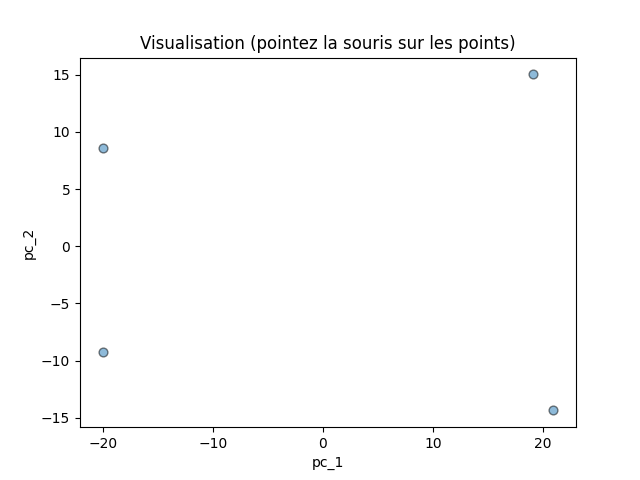

In [12]:
import matplotlib.pyplot as plt
import mplcursors
%matplotlib ipympl

def plot_2D(x_values, y_values, labels):

    # Create scatter plot
    fig, ax = plt.subplots()
    scatter = ax.scatter(x_values, 
                         y_values, 
                         alpha = 0.5, 
                         edgecolors='k',
                         s = 40) 

    # Create a mplcursors object to manage the data point interaction
    cursor = mplcursors.cursor(scatter, hover=True)

    #aes
    ax.set_title('Visualisation (pointez la souris sur les points)')  # Add a title
    ax.set_xlabel('pc_1')  # Add x-axis label
    ax.set_ylabel('pc_2')  # Add y-axis label

    # Define how each annotation should look
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set_text(labels[sel.target.index])
        sel.annotation.get_bbox_patch().set(facecolor='white', alpha=0.5) # Set annotation's background color
        sel.annotation.set_fontsize(12) 

    plt.show()


plot_2D(pc[:,0], pc[:,1], np.array(list(map(lambda x: x[0].text, input))))